In [18]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [19]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math


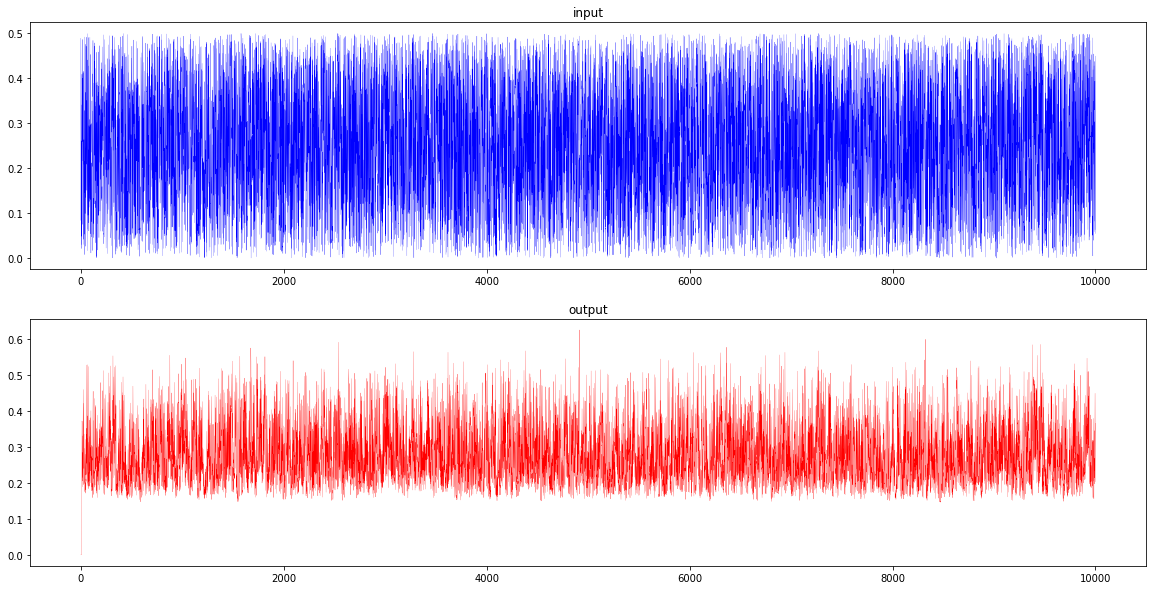

In [20]:
x, y = np.loadtxt("data.txt", delimiter=",")
t=np.arange(start=0,stop=len(x), step=1)

plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.title('input')
plt.plot(t,x, color = 'b', linewidth= 0.2)
plt.subplot(2,1,2)
plt.title('output')
plt.plot(t,y, color = 'r', linewidth = 0.2)

x_train = x[:4000]
x_valid = x[4000:5000]
x_test = x[5000:]

y_train = x[:4000]
y_valid = x[4000:5000]
y_test = x[5000:]

## RNN

In [21]:
def create_model(hidden_units,dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0], return_sequences=True)) #stateful = True
    model.add(Dense(units=dense_units, activation=activation[1]))
    learning_rate = 0.01
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [22]:
model = create_model(20, 1 , (len(x_train),1), activation=['tanh', 'tanh'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 4000, 20)          440       
                                                                 
 dense_1 (Dense)             (None, 4000, 1)           21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [23]:
wx = model.get_weights()[0]
wh = model.get_weights()[1]
bh = model.get_weights()[2]
wy = model.get_weights()[3]
by = model.get_weights()[4]
 
print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)




wx =  [[-0.18061677 -0.04088265 -0.00743318 -0.01439959 -0.19218335  0.40360874
  -0.43558002  0.09454739  0.42521864 -0.39163154 -0.24458596  0.42889363
   0.16016138  0.47222012  0.18312544 -0.49876928  0.2787786   0.50006264
   0.32161278  0.07832479]]  wh =  [[-0.03068113  0.13449585 -0.1338687  -0.19489232  0.15278848  0.10597125
  -0.50632626 -0.0645579   0.01408993 -0.10936744 -0.18612494 -0.29353115
   0.00268444  0.20988503  0.27405816 -0.2733719  -0.21756828  0.03785775
  -0.1574534   0.47909838]
 [ 0.32060388  0.02879925  0.03927595 -0.15442453 -0.26665637  0.13047108
   0.02993806 -0.00131284  0.15360688  0.33133328  0.00319922  0.1838015
   0.22897394  0.10100701  0.17387483 -0.36446247  0.6005145  -0.01263623
  -0.12474727  0.11296891]
 [ 0.13509011 -0.2744559  -0.0881258   0.5152027   0.10399143 -0.3124951
  -0.00845563 -0.14930718  0.47221953  0.01438799 -0.09296471  0.12849155
  -0.0362693   0.07572549 -0.20158246 -0.18050101 -0.07675084 -0.28762797
   0.03813342  0.28

In [24]:
print(x_train.shape)

(4000,)


In [25]:

X_train = np.reshape(x_train, (1,len(x_train),1))
Y_train = np.reshape(y_train, (1,len(y_train),1))

X_valid = np.reshape(x_valid, (1,len(x_valid),1))
Y_valid = np.reshape(y_valid, (1,len(y_valid),1))

print(X_train.shape)
print(Y_train.shape)

print(X_valid.shape)
print(Y_valid.shape)


model.evaluate(X_train, Y_train)
#history = model.fit(X_train, Y_train, epochs = 100, validation_data = (X_valid, Y_valid))
history = model.fit(X_train, Y_train,validation_data = (X_valid, Y_valid), epochs = 300).history




(1, 4000, 1)
(1, 4000, 1)
(1, 1000, 1)
(1, 1000, 1)
1/1 [==============================] - 0s 447ms/step - loss: 0.0721
Epoch 1/400
1/1 [==============================] - 2s 2s/step - loss: 0.0721 - val_loss: 0.0651
Epoch 2/400
1/1 [==============================] - 0s 436ms/step - loss: 0.0623 - val_loss: 0.0574
Epoch 3/400
1/1 [==============================] - 0s 435ms/step - loss: 0.0549 - val_loss: 0.0516
Epoch 4/400
1/1 [==============================] - 0s 432ms/step - loss: 0.0492 - val_loss: 0.0471
Epoch 5/400
1/1 [==============================] - 0s 435ms/step - loss: 0.0449 - val_loss: 0.0437
Epoch 6/400
1/1 [==============================] - 0s 449ms/step - loss: 0.0416 - val_loss: 0.0411
Epoch 7/400
1/1 [==============================] - 0s 410ms/step - loss: 0.0391 - val_loss: 0.0389
Epoch 8/400
1/1 [==============================] - 1s 626ms/step - loss: 0.0370 - val_loss: 0.0371
Epoch 9/400
1/1 [==============================] - 0s 486ms/step - loss: 0.0352 - val_loss:

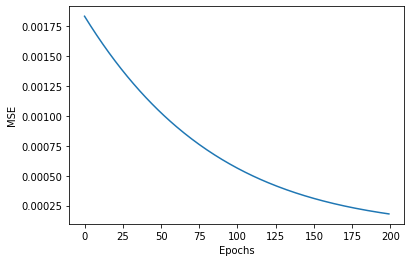

In [ ]:
plt.plot(history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

plt.plot(history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

1/1 [==============================] - 0s 44ms/step - loss: 2.7242e-04


0.00027241860516369343

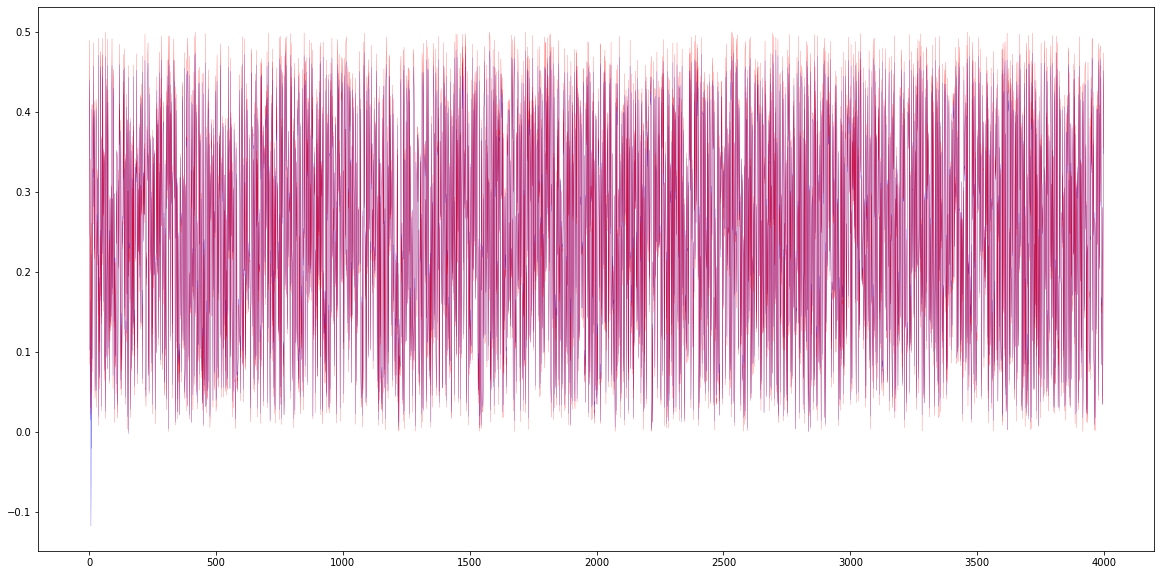

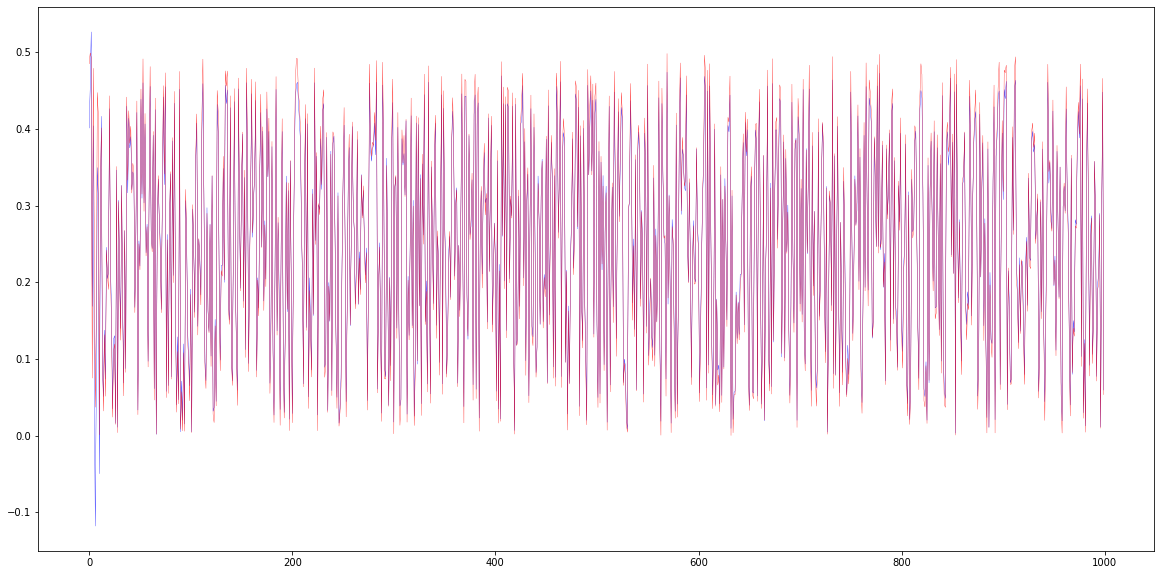

In [ ]:
y = model.predict(X_train)
t=np.arange(start=0,stop=len(X_train[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.2)
plt.plot(t,Y_train.ravel(), color = 'r', linewidth= 0.2)
model.evaluate(X_train, Y_train)


y = model.predict(X_valid)
t=np.arange(start=0,stop=len(X_valid[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.3)
plt.plot(t,Y_valid.ravel(), color = 'r', linewidth= 0.3)
model.evaluate(X_valid, Y_valid)
